In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [28]:
df = pd.read_csv('personality_dataset.csv')

In [29]:
category = df.copy()

In [30]:
category['Stage_fear_yes'] = category['Stage_fear'].apply(lambda x : 1 if x == 'Yes' else 0)
category['Stage_fear_no'] = category['Stage_fear'].apply(lambda x : 1 if x == 'No' else 0)

In [31]:
category['Drained_after_socializing_yes'] = category['Drained_after_socializing'].apply(lambda x : 1 if x == 'Yes' else 0)
category['Drained_after_socializing_no'] = category['Drained_after_socializing'].apply(lambda x : 1 if x == 'No' else 0)

In [32]:
category.drop(columns={'Stage_fear','Drained_after_socializing'},inplace= True)


In [33]:
category

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_yes,Stage_fear_no,Drained_after_socializing_yes,Drained_after_socializing_no
0,4.0,4.0,6.0,13.0,5.0,Extrovert,0,1,0,1
1,9.0,0.0,0.0,0.0,3.0,Introvert,1,0,1,0
2,9.0,1.0,2.0,5.0,2.0,Introvert,1,0,1,0
3,0.0,6.0,7.0,14.0,8.0,Extrovert,0,1,0,1
4,3.0,9.0,4.0,8.0,5.0,Extrovert,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2895,3.0,7.0,6.0,6.0,6.0,Extrovert,0,1,0,1
2896,3.0,8.0,3.0,14.0,9.0,Extrovert,0,1,0,1
2897,4.0,1.0,1.0,4.0,0.0,Introvert,1,0,1,0
2898,11.0,1.0,NaN,2.0,0.0,Introvert,1,0,1,0


In [34]:
predict_train,predict_test,target_train,target_test = train_test_split(
    category.drop(['Personality'],axis = 1),
    category['Personality'],
    test_size = 0.25,
    random_state = 123
)

In [35]:
model_categoric = DecisionTreeClassifier()

In [36]:
model_categoric = model_categoric.fit(predict_train,target_train)
model_categoric.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
        'Friends_circle_size', 'Post_frequency', 'Stage_fear_yes',
        'Stage_fear_no', 'Drained_after_socializing_yes',
        'Drained_after_socializing_no'], dtype=object),
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Extrovert', 'Introvert'], dtype=object),
 'n_classes_': np.int64(2),
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x11757410730>}

In [37]:
target_predict = model_categoric.predict(predict_test)

In [38]:
cm = confusion_matrix(target_test,target_predict)
print(cm)

[[323  41]
 [ 58 303]]


In [39]:
acuracia = accuracy_score(target_test,target_predict)
print(acuracia)

0.863448275862069


In [40]:
category

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_yes,Stage_fear_no,Drained_after_socializing_yes,Drained_after_socializing_no
0,4.0,4.0,6.0,13.0,5.0,Extrovert,0,1,0,1
1,9.0,0.0,0.0,0.0,3.0,Introvert,1,0,1,0
2,9.0,1.0,2.0,5.0,2.0,Introvert,1,0,1,0
3,0.0,6.0,7.0,14.0,8.0,Extrovert,0,1,0,1
4,3.0,9.0,4.0,8.0,5.0,Extrovert,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2895,3.0,7.0,6.0,6.0,6.0,Extrovert,0,1,0,1
2896,3.0,8.0,3.0,14.0,9.0,Extrovert,0,1,0,1
2897,4.0,1.0,1.0,4.0,0.0,Introvert,1,0,1,0
2898,11.0,1.0,NaN,2.0,0.0,Introvert,1,0,1,0


In [41]:
def questions_categoric():
    quests = np.array([])
    
    try:
        time_spend_alone = float(input('How many times do you spend alone during the day? '))
        quests = np.append(quests, time_spend_alone)

        social_event_attendance = float(input('How many times do you attend social events? '))
        quests = np.append(quests, social_event_attendance)

        going_outside = float(input('How many times do you go outside? '))
        quests = np.append(quests, going_outside)

        
        Friends_circle_size = float(input('How many friends do tou have?'))
        quests = np.append(quests,Friends_circle_size)

        post_frequency = float(input('How often do you post on social media? '))
        quests = np.append(quests, post_frequency)
    
    except ValueError:
        print("Invalid number input.")
        return None

    try:
        stage_fear = input('Do you have stage fear? (yes or no): ').strip().upper()
        if stage_fear == 'YES':
            quests = np.append(quests, [1, 0])  # YES = 1, NO = 0
        elif stage_fear == 'NO':
            quests = np.append(quests, [0, 1])
        else:
            print("Invalid input for stage fear.")
            return None
    except Exception as erro:
        print("Erro:", erro)
        return None

    try:
        drained = input('Do you feel drained after socializing? (yes or no): ').strip().upper()
        if drained == 'YES':
            quests = np.append(quests, [1, 0])
        elif drained == 'NO':
            quests = np.append(quests, [0, 1])
        else:
            print("Invalid input for socializing.")
            return None
    except Exception as erro:
        print("Erro:", erro)
        return None

    return quests

In [42]:
test_categoric = questions_categoric()

model_categoric = model_categoric.predict(test_categoric.reshape(1, -1))

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [43]:
print(model_categoric)

['Extrovert']


# Count:

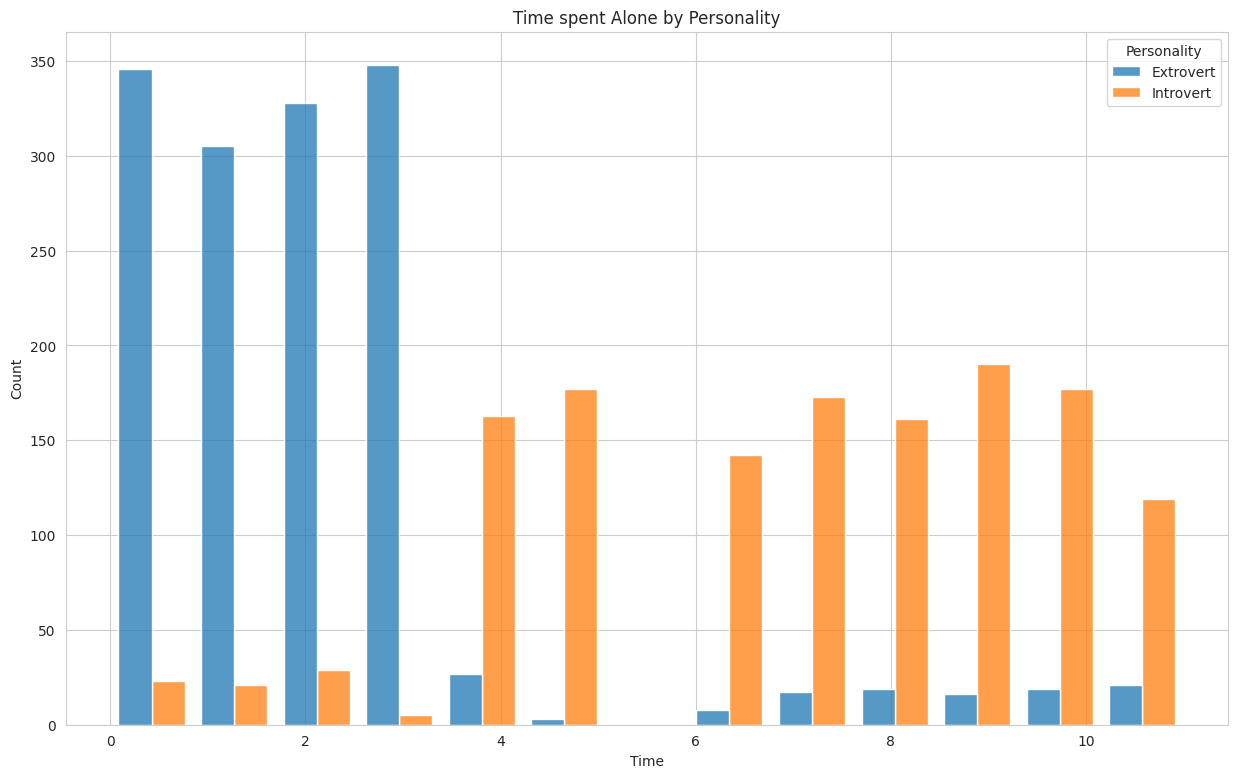

In [6]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (15,9))
    grafico = sns.histplot(data = df, x = 'Time_spent_Alone', hue = 'Personality', multiple = 'dodge', shrink = 0.8)
    grafico.set(title ='Time spent Alone by Personality', xlabel = 'Time', ylabel = 'Count')

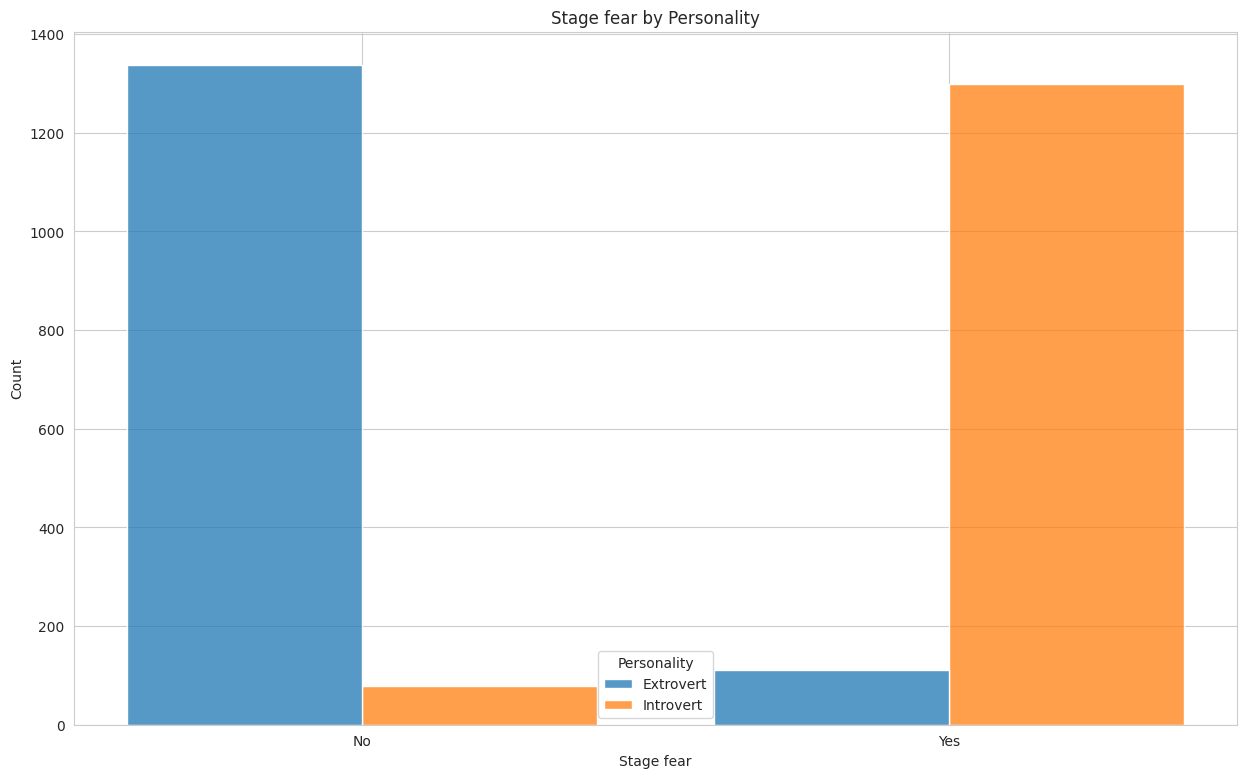

In [7]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15,9))
    grafico = sns.histplot(data = df , x = 'Stage_fear', hue = 'Personality', multiple = 'dodge', shrink = 0.8)
    grafico.set(title = 'Stage fear by Personality', xlabel = 'Stage fear', ylabel = 'Count')

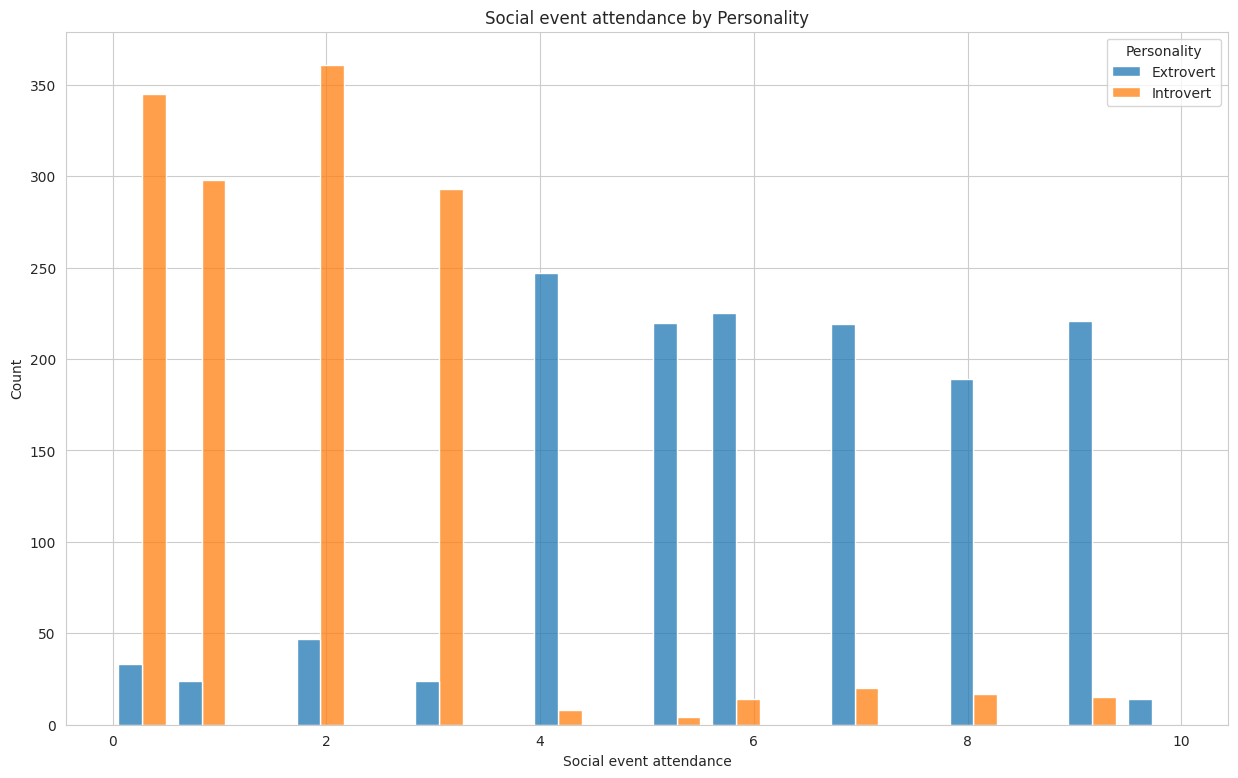

In [8]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15,9))
    grafico = sns.histplot(data = df, x = 'Social_event_attendance', hue = 'Personality', multiple = 'dodge', shrink = 0.8)
    grafico.set(title = 'Social event attendance by Personality', xlabel = 'Social event attendance', ylabel = 'Count')

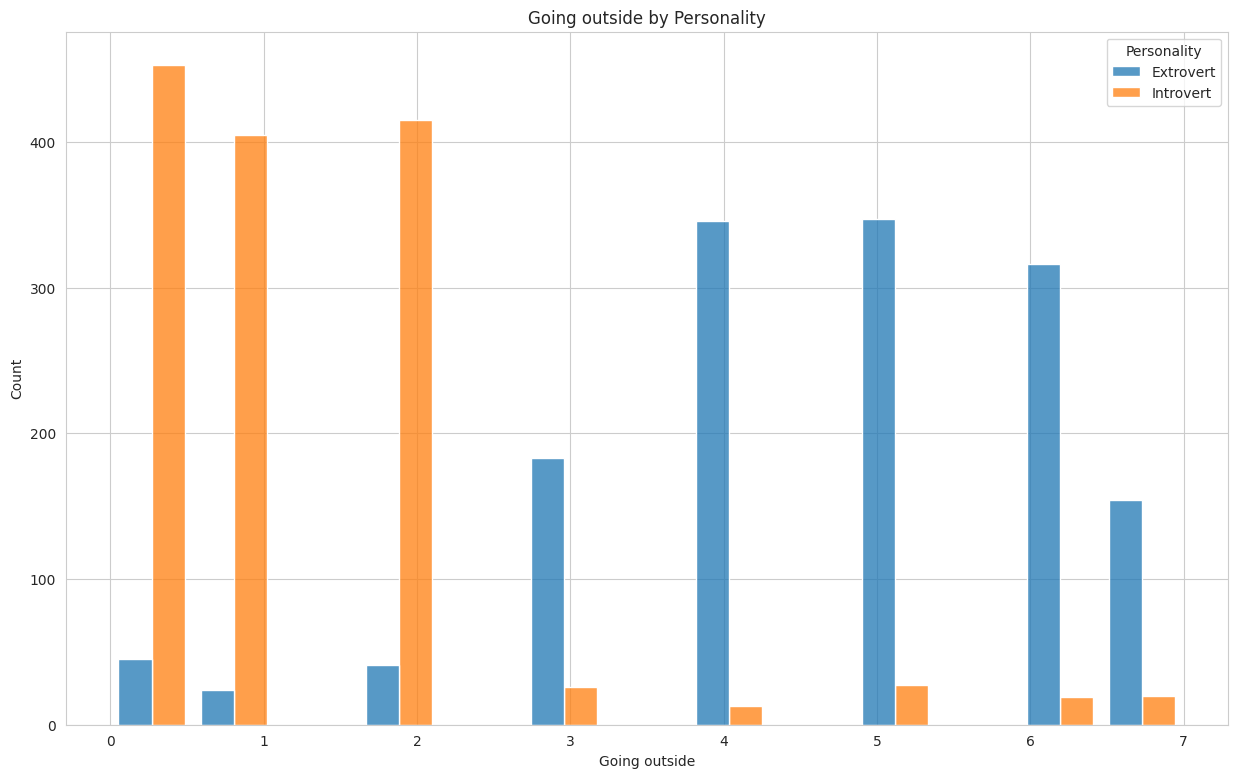

In [9]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15,9))
    grafico = sns.histplot(data = df, x = 'Going_outside', hue = 'Personality', multiple = 'dodge', shrink = 0.8)
    grafico.set(title = 'Going outside by Personality', xlabel = 'Going outside', ylabel = 'Count')

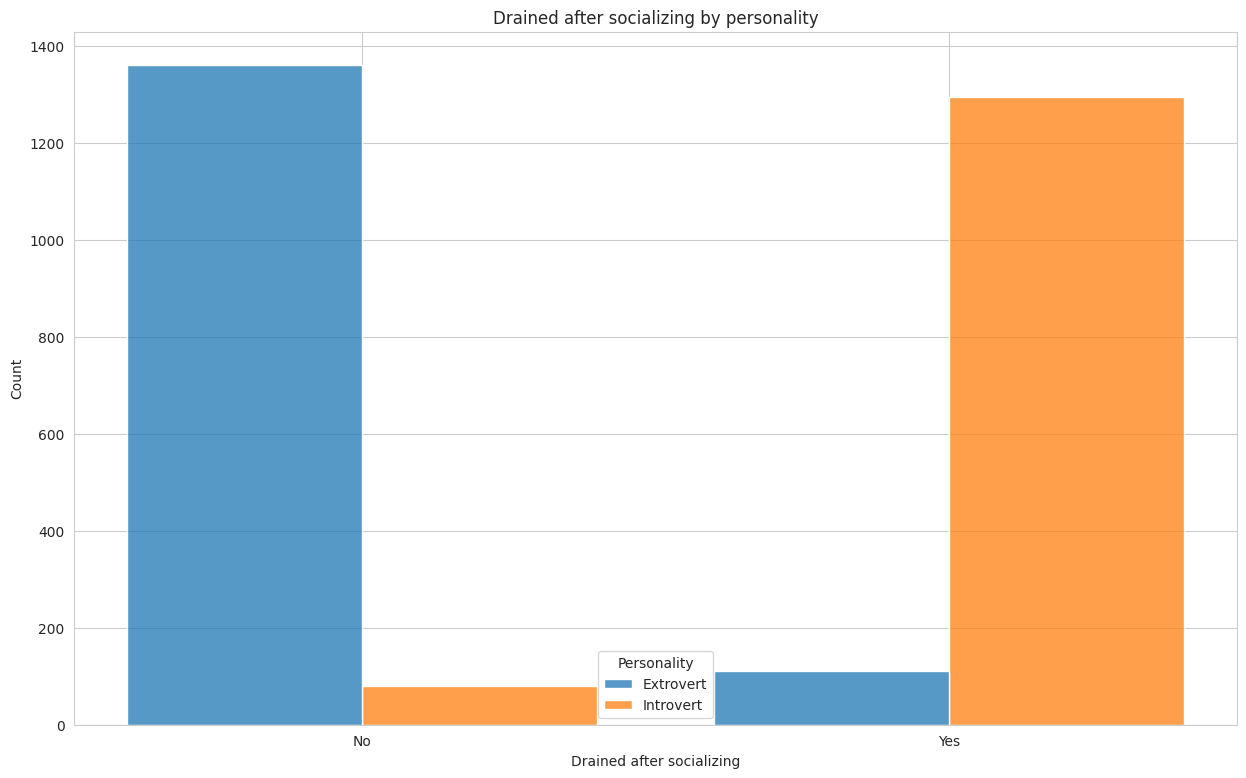

In [10]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (15,9))
    grafico = sns.histplot(data = df, x = 'Drained_after_socializing', hue = 'Personality', multiple = 'dodge', shrink = 0.8)
    grafico.set(title = 'Drained after socializing by personality', xlabel = 'Drained after socializing', ylabel = 'Count')

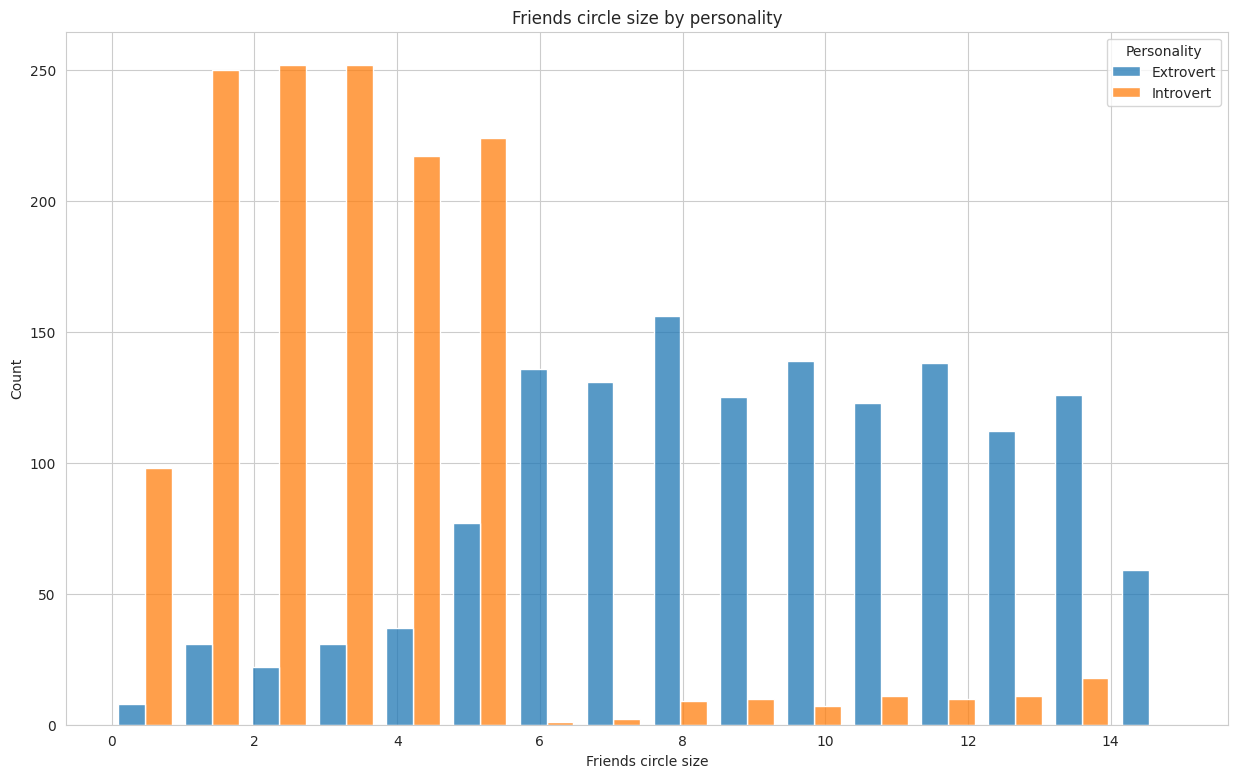

In [11]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15,9))
    grafico = sns.histplot(data = df, x = 'Friends_circle_size', hue = 'Personality', multiple = 'dodge', shrink = 0.8)
    grafico.set(title = 'Friends circle size by personality', xlabel = 'Friends circle size', ylabel = 'Count')


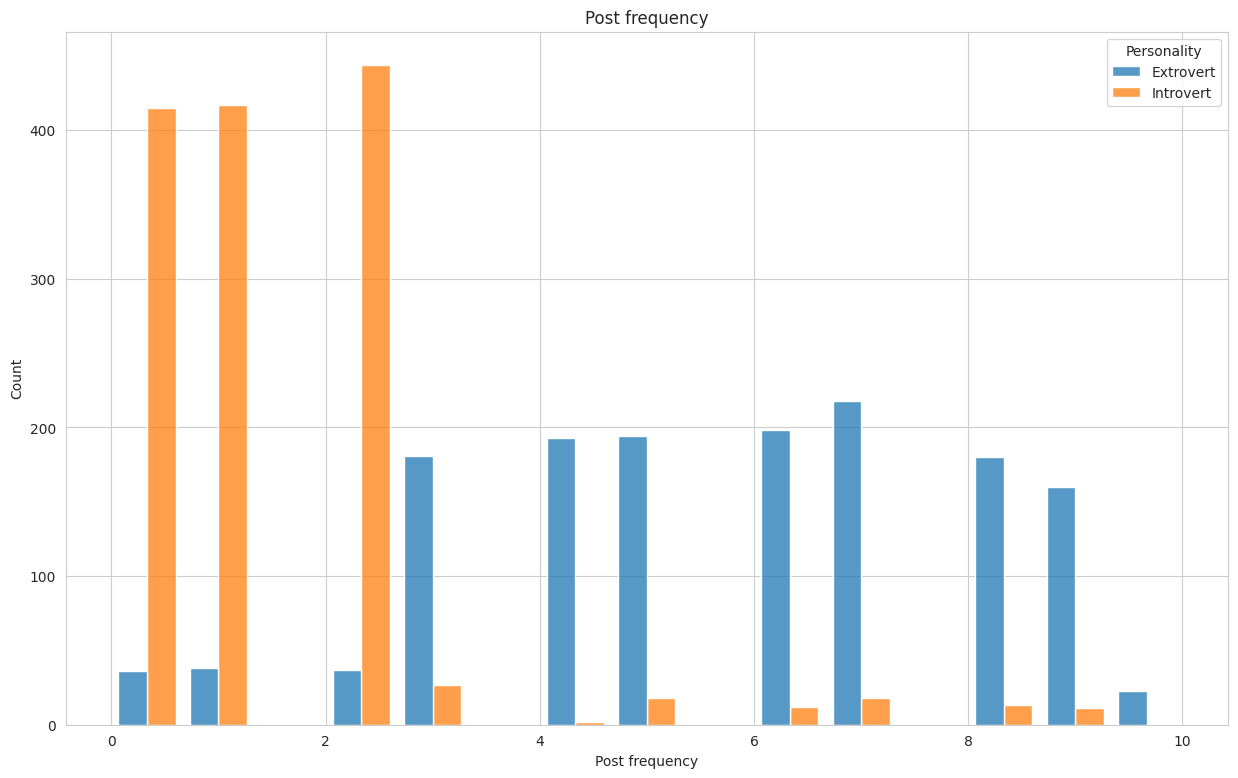

In [12]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (15,9))
    grafico = sns.histplot(data = df, x = 'Post_frequency', hue = 'Personality', multiple = 'dodge', shrink = 0.8)
    grafico.set(title = 'Post frequency', xlabel = 'Post frequency', ylabel = 'Count')

In [13]:
df.dropna(inplace=True) 

In [14]:
df['stage_fear_yes'] = df['Stage_fear'].apply(lambda x : 1 if x == 'Yes' else 0)
df['Stage_fear_no'] = df['Stage_fear'].apply(lambda x : 1 if x == 'No' else 0)

In [15]:
df['Drained_after_socializing_Yes'] = df['Drained_after_socializing'].apply(lambda x : 1 if x == 'Yes' else 0)
df['Drained_after_socializing_No'] = df['Drained_after_socializing'].apply(lambda x : 1 if x == 'No' else 0)


In [16]:
df['Personality_extro'] = df['Personality'].apply(lambda x : 1 if x == 'Extrovert' else 0)
df['Extrovert_intro'] =  df['Personality'].apply(lambda x : 1 if x == 'Introvert' else 0)

In [17]:
df.drop(columns= ['Stage_fear','Drained_after_socializing','Personality'],inplace = True)

In [18]:
model = LinearRegression()

In [19]:
predicts_train, predicts_test, target_train, target_test = train_test_split(
    df.drop(['Friends_circle_size'], axis = 1),
    df['Friends_circle_size'],
    test_size = 0.25,
    random_state = 123
)

In [20]:
model = model.fit(predicts_train, target_train)

In [21]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
        'Post_frequency', 'stage_fear_yes', 'Stage_fear_no',
        'Drained_after_socializing_Yes', 'Drained_after_socializing_No',
        'Personality_extro', 'Extrovert_intro'], dtype=object),
 'n_features_in_': 10,
 'coef_': array([ 0.00720072,  0.10260135, -0.00430554, -0.01598613, -1.90763739,
         1.90763739, -1.90763739,  1.90763739, -0.45965952,  0.45965952]),
 'rank_': 6,
 'singular_': array([2.32175929e+02, 7.39290159e+01, 6.42409696e+01, 4.95609505e+01,
        1.96315106e+01, 9.40366664e+00, 1.37424628e-14, 5.60436325e-15,
        2.95518127e-15, 3.46426359e-16]),
 'intercept_': np.float64(5.863033772745554)}

In [22]:
test = np.array([4,4,6,5,0,1,0,1,1,0])
a = model.predict(test.reshape(1, -1))

target_prediction = model.predict(predicts_test)

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
rsme = np.sqrt(mean_squared_error(target_test, target_prediction))
rsme

np.float64(2.308580443528933)

In [24]:
def questions():
    quests = np.array([])
    
    try:
        time_spend_alone = float(input('How many times do you spend alone during the day? '))
        quests = np.append(quests, time_spend_alone)

        social_event_attendance = float(input('How many times do you attend social events? '))
        quests = np.append(quests, social_event_attendance)

        going_outside = float(input('How many times do you go outside? '))
        quests = np.append(quests, going_outside)

        post_frequency = float(input('How often do you post on social media? '))
        quests = np.append(quests, post_frequency)

    except ValueError:
        print("Invalid number input.")
        return None

    try:
        stage_fear = input('Do you have stage fear? (yes or no): ').strip().upper()
        if stage_fear == 'YES':
            quests = np.append(quests, [1, 0])  # YES = 1, NO = 0
        elif stage_fear == 'NO':
            quests = np.append(quests, [0, 1])
        else:
            print("Invalid input for stage fear.")
            return None
    except Exception as erro:
        print("Erro:", erro)
        return None

    try:
        drained = input('Do you feel drained after socializing? (yes or no): ').strip().upper()
        if drained == 'YES':
            quests = np.append(quests, [1, 0])
        elif drained == 'NO':
            quests = np.append(quests, [0, 1])
        else:
            print("Invalid input for socializing.")
            return None
    except Exception as erro:
        print("Erro:", erro)
        return None

    try:
        personality = input('Are you an extrovert or introvert? ').strip().upper()
        if personality == 'EXTROVERT':
            quests = np.append(quests, [1, 0])
        elif personality == 'INTROVERT':
            quests = np.append(quests, [0, 1])
        else:
            print("Invalid input for personality.")
            return None
    except Exception as erro:
        print("Erro:", erro)
        return None

    return quests
    

In [ ]:
person = questions()

answer = int(model.predict(person.reshape(1,-1) + 1).round())
print(answer)